<a href="https://colab.research.google.com/github/Flash-sheep/GDS-learn/blob/main/%E2%80%9CSPIN_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab demo for:

# SPIN - SMPL oPtimization IN the loop

```
@inproceedings{kolotouros2019spin,
  title={Learning to Reconstruct 3{D} Human Pose and Shape via Model-fitting in the Loop},
  author={Kolotouros, Nikos and Pavlakos, Georgios and Black, Michael J and Daniilidis, Kostas},
  booktitle={ICCV},
  year={2019}
}
```

Github Repo: https://github.com/nkolot/SPIN

Paper: https://arxiv.org/pdf/1909.12828.pdf

In [1]:
# Copy SPIN repo
!git clone https://github.com/nkolot/SPIN.git
%cd SPIN
!git checkout origin/cuda11_fix

Cloning into 'SPIN'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 206 (delta 82), reused 74 (delta 69), pack-reused 92
Receiving objects: 100% (206/206), 1.97 MiB | 5.88 MiB/s, done.
Resolving deltas: 100% (99/99), done.
/content/SPIN
Note: switching to 'origin/cuda11_fix'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 3dcd85d Add colab demo


In [2]:
# Install pytorch
!pip install torch torchvision
# Install the rest of the dependencies
!pip install -r requirements.txt
!pip install dill

  Cloning https://github.com/mattloper/chumpy.git to /tmp/pip-req-build-zj4hekkd
  Running command git clone --filter=blob:none --quiet https://github.com/mattloper/chumpy.git /tmp/pip-req-build-zj4hekkd
  Resolved https://github.com/mattloper/chumpy.git to commit 51d5afd92a8ded3637553be8cef41f328a1c863a
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/shubham-goel/NMR.git to /tmp/pip-req-build-q3n8ckhk
  Running command git clone --filter=blob:none --quiet https://github.com/shubham-goel/NMR.git /tmp/pip-req-build-q3n8ckhk
  Resolved https://github.com/shubham-goel/NMR.git to commit e990b3c70f48d39231f607c79d76ce3db4bf7483
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━

In [3]:
# Get SPIN data
!sh fetch_data.sh

--2023-12-29 14:42:39--  http://visiondata.cis.upenn.edu/spin/data.tar.gz
Resolving visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)... 158.130.68.16
Connecting to visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)|158.130.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14960640 (14M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  14.27M  16.0MB/s    in 0.9s    

2023-12-29 14:42:41 (16.0 MB/s) - ‘data.tar.gz’ saved [14960640/14960640]

data/
data/J_regressor_h36m.npy
data/cube_parts.npy
data/train.h5
data/vertex_texture.npy
data/smpl_mean_params.npz
data/J_regressor_extra.npy
data/gmm_08.pkl
--2023-12-29 14:42:41--  http://visiondata.cis.upenn.edu/spin/static_fits.tar.gz
Resolving visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)... 158.130.68.16
Connecting to visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)|158.130.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1621

In [4]:
# Get SMPL
def convert_pkl(old_pkl, new_pkl):
    """
    Convert a Python 2 pickle to Python 3
    """
    import dill
    import pickle

    # Convert Python 2 "ObjectType" to Python 3 object
    dill._dill._reverse_typemap["ObjectType"] = object

    # Open the pickle using latin1 encoding
    with open(old_pkl, "rb") as f:
        loaded = pickle.load(f, encoding="latin1")

    # Re-save as Python 3 pickle
    with open(new_pkl, "wb") as outfile:
        pickle.dump(loaded, outfile)

!wget https://github.com/classner/up/raw/master/models/3D/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl
%mkdir -p data/smpl/
convert_pkl('basicModel_neutral_lbs_10_207_0_v1.0.0.pkl', 'data/smpl/SMPL_NEUTRAL.pkl')

--2023-12-29 14:43:11--  https://github.com/classner/up/raw/master/models/3D/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/classner/up/master/models/3D/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl [following]
--2023-12-29 14:43:11--  https://raw.githubusercontent.com/classner/up/master/models/3D/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39001280 (37M) [application/octet-stream]
Saving to: ‘basicModel_neutral_lbs_10_207_0_v1.0.0.pkl’

basicModel_neutral_ 100%[===================>]  37.19M  --.-KB/s    in 0

<ipython-input-4-9d95e2e71a5a>:14: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  loaded = pickle.load(f, encoding="latin1")


In [5]:
# Run demo
!python3 demo.py --checkpoint=data/model_checkpoint.pt --img=examples/im1010.jpg --openpose=examples/im1010_openpose.json

/content/SPIN/utils/saver.py:69: SyntaxWarning: "is" with a literal. Did you mean "=="?
  self.latest_checkpoint =  None if (len(checkpoint_list) is 0) else checkpoint_list[-1]
2023-12-29 14:43:18.204269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 14:43:18.204317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 14:43:18.206328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 14:43:21.766466: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/models/_util

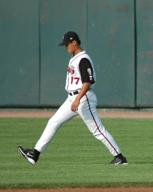

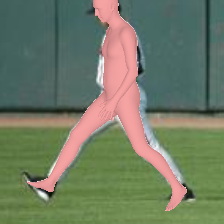

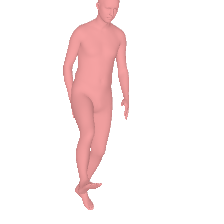

In [6]:
# Visualize data
from IPython.display import Image, display
display(Image('examples/im1010.jpg'))
display(Image('examples/im1010_shape.png'))
display(Image('examples/im1010_shape_side.png'))

In [7]:
from google.colab import files
files.view('demo.py')

<IPython.core.display.Javascript object>

In [8]:
import os

current_directory = os.getcwd()
print("当前目录位置：", current_directory)

当前目录位置： /content/SPIN


In [9]:
!ls

basicModel_neutral_lbs_10_207_0_v1.0.0.pkl  eval.py	    preprocess_datasets.py  train
config.py				    examples	    __pycache__		    train.py
constants.py				    fetch_data.sh   README.md		    utils
data					    LICENSE	    requirements.txt
datasets				    models	    smplify
demo.py					    notebook.ipynb  teaser.png
